In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import *
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
import warnings

In [2]:
df=pd.read_csv("stroke.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df=df.drop('id',axis=1)

In [4]:
df["bmi"] = df["bmi"].fillna(df["bmi"].median())

In [5]:
df['ever_married']=df['ever_married'].replace({'No': 0, 'Yes': 1})
df['Residence_type'] = df['Residence_type'].replace({'Rural': 0, 'Urban': 1})

In [6]:
def onehotencoding(df, column):
    df=df.copy()
    dummies=pd.get_dummies(df[column], prefix=column)
    df=pd.concat([df, dummies],axis=1)
    df=df.drop(column, axis=1)
    return df

In [7]:
for column in ['gender', 'work_type', 'smoking_status']:
    df=onehotencoding(df, column=column)

In [8]:
df

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0,0,1,0,202.21,28.1,1,1,0,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,1,1,171.23,34.4,1,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,1,0,174.12,24.0,1,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,1,83.75,28.1,0,1,0,0,0,0,1,0,0,0,0,1,0
5106,81.0,0,0,1,1,125.20,40.0,0,1,0,0,0,0,0,1,0,0,0,1,0
5107,35.0,0,0,1,0,82.99,30.6,0,1,0,0,0,0,0,1,0,0,0,1,0
5108,51.0,0,0,1,0,166.29,25.6,0,0,1,0,0,0,1,0,0,0,1,0,0


In [9]:
df_oversampled=df.copy()
df_oversampled.shape

(5110, 20)

In [11]:
df = df.sample(frac=1, random_state=15).reset_index(drop=True)

#make new splits for train, test and unlabelled
test_indices = round(len(df)*0.10)
train_indices = test_indices + round(len(df)*0.01)
unlabeled_indices = train_indices + round(len(df)*0.89)

#splitting the data into testing, training and unlabelled 

test = df.iloc[:test_indices]
train = df.iloc[test_indices:train_indices]
unlabeled = df.iloc[train_indices:unlabeled_indices]


#making training and test sets and dropping the storke feature column from train and unlabelled sets

X_train = train.drop('stroke', axis=1)
y_train = train.stroke

X_unlabeled = unlabeled.drop('stroke', axis=1)

X_test = test.drop('stroke', axis=1)
y_test = test.stroke

#checking the dimensions of all the sets

print(f"X_train dimensions: {X_train.shape}")
print(f"y_train dimensions: {y_train.shape}\n")

print(f"X_test dimensions: {X_test.shape}")
print(f"y_test dimensions: {y_test.shape}\n")

print(f"X_unlabeled dimensions: {X_unlabeled.shape}")

X_train dimensions: (51, 19)
y_train dimensions: (51,)

X_test dimensions: (511, 19)
y_test dimensions: (511,)

X_unlabeled dimensions: (4548, 19)


# Logistic Regression

Train f1 Score: 1.0
Test f1 Score: 0.2608695652173913


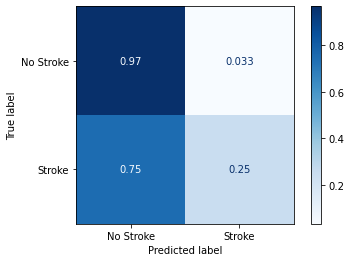

In [12]:
model = LogisticRegression(C=100, penalty='l2', solver='newton-cg', random_state=42)

model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

train_f1 = f1_score(y_train, y_pred_train)
test_f1 = f1_score(y_test, y_pred_test)

print(f"Train f1 Score: {train_f1}")
print(f"Test f1 Score: {test_f1}")

plot_confusion_matrix(model, X_test, y_test, cmap='Blues', normalize='true',
                     display_labels=['No Stroke', 'Stroke']);

In [13]:
model.predict_proba(X_test)

array([[1.00000000e+00, 2.88202200e-34],
       [1.00000000e+00, 1.01714336e-10],
       [1.00000000e+00, 5.15522720e-45],
       ...,
       [9.99999859e-01, 1.40689319e-07],
       [1.00000000e+00, 1.03167401e-52],
       [1.00000000e+00, 2.99642551e-18]])

In [15]:
#initial counter
iterations = 0

# this will hold all the f1 scores and the pseudo labels at every iteration
train_f1s = []
test_f1s = []
pseudo_labels = []

# assign a value to start the counter
high_probability = [1]

#keep training classifier until no more high label probabilities remain
while len(high_probability) > 0:
        
    # Fit classifier and make train/test predictions
    model = LogisticRegression(C=100, penalty='l2', solver='newton-cg', random_state=42)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
     
    # calculate and print the f1 score at every iteration
    train_f1 = f1_score(y_train, y_pred_train)
    test_f1 = f1_score(y_test, y_pred_test)
    print(f"Iteration {iterations}")
    print(f"Train f1: {train_f1}")
    print(f"Test f1: {test_f1}")
    train_f1s.append(train_f1)
    test_f1s.append(test_f1)
    
    #make predictions for the unlabelled set
    pred_probability = model.predict_proba(X_unlabeled)
    predictions = model.predict(X_unlabeled)
    prob_0 = pred_probability[:,0]
    prob_1 = pred_probability[:,1]
    
    # store the probabilities and predictions in a new dataframe
    df_pred_prob = pd.DataFrame([])
    df_pred_prob['predictions'] = predictions
    df_pred_prob['prob_0'] = prob_0
    df_pred_prob['prob_1'] = prob_1
    df_pred_prob.index = X_unlabeled.index
    
    # separate predictions with a probability thats greater than 99% and concatenate
    high_probability = pd.concat([df_pred_prob.loc[df_pred_prob['prob_0'] > 0.99],
                           df_pred_prob.loc[df_pred_prob['prob_1'] > 0.99]],
                          axis=0)
    
    pseudo_labels.append(len(high_probability))

    # Add pseudo-labeled data to training data
    X_train = pd.concat([X_train, X_unlabeled.loc[high_probability.index]], axis=0)
    y_train = pd.concat([y_train, high_probability.predictions])      
    
    # Drop pseudo-labeled instances from unlabelled data
    X_unlabeled = X_unlabeled.drop(index=high_probability.index)
    print(f"{len(X_unlabeled)} unlabelled instances remaining.\n")
    
    # increment iteration counter
    iterations += 1


Iteration 0
Train f1: 1.0
Test f1: 0.2608695652173913
173 unlabelled instances remaining.

Iteration 1
Train f1: 1.0
Test f1: 0.26666666666666666
111 unlabelled instances remaining.

Iteration 2
Train f1: 1.0
Test f1: 0.26666666666666666
79 unlabelled instances remaining.

Iteration 3
Train f1: 1.0
Test f1: 0.30434782608695654
66 unlabelled instances remaining.

Iteration 4
Train f1: 1.0
Test f1: 0.30434782608695654
59 unlabelled instances remaining.

Iteration 5
Train f1: 1.0
Test f1: 0.30434782608695654
53 unlabelled instances remaining.

Iteration 6
Train f1: 1.0
Test f1: 0.30434782608695654
52 unlabelled instances remaining.

Iteration 7
Train f1: 1.0
Test f1: 0.30434782608695654
52 unlabelled instances remaining.



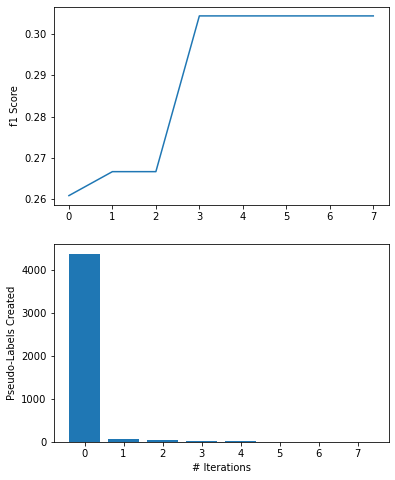

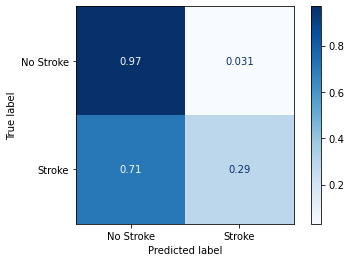

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6,8))
ax1.plot(range(iterations), test_f1s)
ax1.set_ylabel('f1 Score')
ax2.bar(x=range(iterations), height=pseudo_labels)
ax2.set_ylabel('Pseudo-Labels Created')
ax2.set_xlabel('# Iterations');

# View confusion matrix after self-training

plot_confusion_matrix(model, X_test, y_test, cmap='Blues', normalize='true',
                     display_labels=['No Stroke', 'Stroke']);

# Random Forest

Train f1 Score: 1.0
Test f1 Score: 0.3


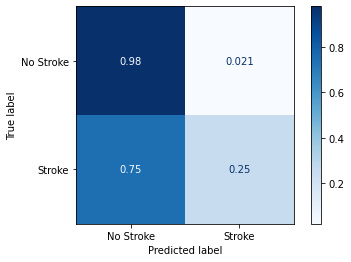

In [17]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

train_f1 = f1_score(y_train, y_pred_train)
test_f1 = f1_score(y_test, y_pred_test)

print(f"Train f1 Score: {train_f1}")
print(f"Test f1 Score: {test_f1}")

plot_confusion_matrix(model, X_test, y_test, cmap='Blues', normalize='true',
                     display_labels=['No Stroke', 'Stroke']);

In [18]:
model.predict_proba(X_test)

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [19]:
#initial counter
iterations = 0

# this will hold all the f1 scores and the pseudo labels at every iteration
train_f1s = []
test_f1s = []
pseudo_labels = []

# assign a value to start the counter
high_probability = [1]

#keep training classifier until no more high label probabilities remain
while len(high_probability) > 0:
        
    # Fit classifier and make train/test predictions
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
     
    # calculate and print the f1 score at every iteration
    train_f1 = f1_score(y_train, y_pred_train)
    test_f1 = f1_score(y_test, y_pred_test)
    print(f"Iteration {iterations}")
    print(f"Train f1: {train_f1}")
    print(f"Test f1: {test_f1}")
    train_f1s.append(train_f1)
    test_f1s.append(test_f1)
    
    #make predictions for the unlabelled set
    pred_probability = model.predict_proba(X_unlabeled)
    predictions = model.predict(X_unlabeled)
    prob_0 = pred_probability[:,0]
    prob_1 = pred_probability[:,1]
    
    # store the probabilities and predictions in a new dataframe
    df_pred_prob = pd.DataFrame([])
    df_pred_prob['predictions'] = predictions
    df_pred_prob['prob_0'] = prob_0
    df_pred_prob['prob_1'] = prob_1
    df_pred_prob.index = X_unlabeled.index
    
    # separate predictions with a probability thats greater than 99% and concatenate
    high_probability = pd.concat([df_pred_prob.loc[df_pred_prob['prob_0'] > 0.99],
                           df_pred_prob.loc[df_pred_prob['prob_1'] > 0.99]],
                          axis=0)
    
    pseudo_labels.append(len(high_probability))

    # Add pseudo-labeled data to training data
    X_train = pd.concat([X_train, X_unlabeled.loc[high_probability.index]], axis=0)
    y_train = pd.concat([y_train, high_probability.predictions])      
    
    # Drop pseudo-labeled instances from unlabelled data
    X_unlabeled = X_unlabeled.drop(index=high_probability.index)
    print(f"{len(X_unlabeled)} unlabelled instances remaining.\n")
    
    # increment iteration counter
    iterations += 1


Iteration 0
Train f1: 1.0
Test f1: 0.3
52 unlabelled instances remaining.



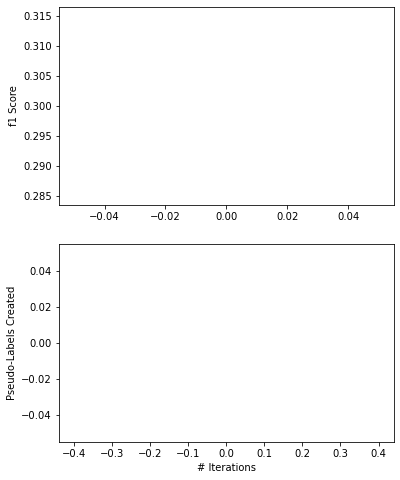

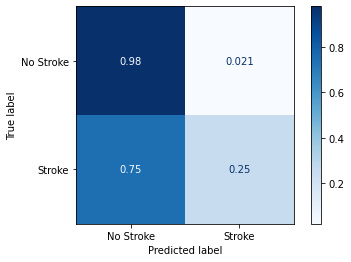

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6,8))
ax1.plot(range(iterations), test_f1s)
ax1.set_ylabel('f1 Score')
ax2.bar(x=range(iterations), height=pseudo_labels)
ax2.set_ylabel('Pseudo-Labels Created')
ax2.set_xlabel('# Iterations');

# View confusion matrix after self-training

plot_confusion_matrix(model, X_test, y_test, cmap='Blues', normalize='true',
                     display_labels=['No Stroke', 'Stroke']);

# GaussianNB

Train f1 Score: 0.46878980891719746
Test f1 Score: 0.28571428571428575


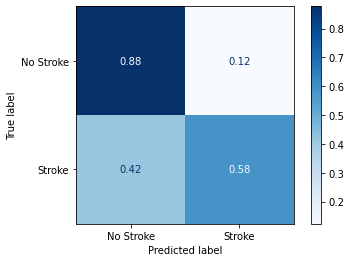

In [21]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

train_f1 = f1_score(y_train, y_pred_train)
test_f1 = f1_score(y_test, y_pred_test)

print(f"Train f1 Score: {train_f1}")
print(f"Test f1 Score: {test_f1}")

plot_confusion_matrix(model, X_test, y_test, cmap='Blues', normalize='true',
                     display_labels=['No Stroke', 'Stroke']);

In [22]:
model.predict_proba(X_test)

array([[1.00000000e+00, 6.53047834e-52],
       [9.98799648e-01, 1.20035238e-03],
       [1.00000000e+00, 5.94825391e-67],
       ...,
       [2.72922070e-08, 9.99999973e-01],
       [1.00000000e+00, 4.79449878e-76],
       [1.00000000e+00, 1.22752563e-15]])

In [23]:
#initial counter
iterations = 0

# this will hold all the f1 scores and the pseudo labels at every iteration
train_f1s = []
test_f1s = []
pseudo_labels = []

# assign a value to start the counter
high_probability = [1]

#keep training classifier until no more high label probabilities remain
while len(high_probability) > 0:
        
    # Fit classifier and make train/test predictions
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
     
    # calculate and print the f1 score at every iteration
    train_f1 = f1_score(y_train, y_pred_train)
    test_f1 = f1_score(y_test, y_pred_test)
    print(f"Iteration {iterations}")
    print(f"Train f1: {train_f1}")
    print(f"Test f1: {test_f1}")
    train_f1s.append(train_f1)
    test_f1s.append(test_f1)
    
    #make predictions for the unlabelled set
    pred_probability = model.predict_proba(X_unlabeled)
    predictions = model.predict(X_unlabeled)
    prob_0 = pred_probability[:,0]
    prob_1 = pred_probability[:,1]
    
    # store the probabilities and predictions in a new dataframe
    df_pred_prob = pd.DataFrame([])
    df_pred_prob['predictions'] = predictions
    df_pred_prob['prob_0'] = prob_0
    df_pred_prob['prob_1'] = prob_1
    df_pred_prob.index = X_unlabeled.index
    
    # separate predictions with a probability thats greater than 99% and concatenate
    high_probability = pd.concat([df_pred_prob.loc[df_pred_prob['prob_0'] > 0.99],
                           df_pred_prob.loc[df_pred_prob['prob_1'] > 0.99]],
                          axis=0)
    
    pseudo_labels.append(len(high_probability))

    # Add pseudo-labeled data to training data
    X_train = pd.concat([X_train, X_unlabeled.loc[high_probability.index]], axis=0)
    y_train = pd.concat([y_train, high_probability.predictions])      
    
    # Drop pseudo-labeled instances from unlabelled data
    X_unlabeled = X_unlabeled.drop(index=high_probability.index)
    print(f"{len(X_unlabeled)} unlabelled instances remaining.\n")
    
    # increment iteration counter
    iterations += 1


Iteration 0
Train f1: 0.46878980891719746
Test f1: 0.28571428571428575
1 unlabelled instances remaining.

Iteration 1
Train f1: 0.4864864864864865
Test f1: 0.2616822429906542
1 unlabelled instances remaining.



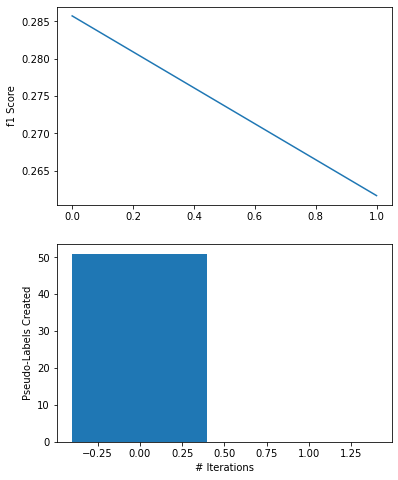

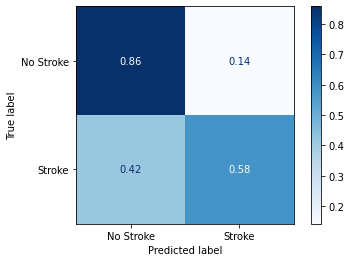

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6,8))
ax1.plot(range(iterations), test_f1s)
ax1.set_ylabel('f1 Score')
ax2.bar(x=range(iterations), height=pseudo_labels)
ax2.set_ylabel('Pseudo-Labels Created')
ax2.set_xlabel('# Iterations');

# View confusion matrix after self-training

plot_confusion_matrix(model, X_test, y_test, cmap='Blues', normalize='true',
                     display_labels=['No Stroke', 'Stroke']);